In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mrcfile
import torch
import matplotlib.pyplot as plt 
import numpy as np

from analysis_code.io import load_methods_results
from analysis_code.svd_analysis import (
    compute_distance_matrix,
    compute_common_embedding
)

In [3]:
path_to_3dva_1 = "/mnt/home/mastore/ceph/cryosparc_folder/CS-trpv1-refinement-nanodisc-masking/J1216/mode1/"
path_to_3dva_2 = "/mnt/home/mastore/ceph/cryosparc_folder/CS-trpv1-refinement-nanodisc-masking/J1216/mode2/"

path_to_md_1 = "/mnt/home/mastore/ceph/unbiased_trpv1_second_round/double_toxin_bound/clustering/pc_analysis/backbone_volume_making/mult_1.5/mode1/"
path_to_md_2 = "/mnt/home/mastore/ceph/unbiased_trpv1_second_round/double_toxin_bound/clustering/pc_analysis/backbone_volume_making/mult_1.5/mode2/"

path_to_3dflex_mode_1 ="/mnt/home/mastore/ceph/cryosparc_folder/CS-trpv1-refinement-nanodisc-masking/J1168/mode1/"
path_to_3dflex_mode_2 ="/mnt/home/mastore/ceph/cryosparc_folder/CS-trpv1-refinement-nanodisc-masking/J1168/mode2/"

path_to_cdrgn="/mnt/home/mastore/ceph/cryosparc_folder/CS-trpv1-refinement-nanodisc-masking/J310/cryodrgn/fifth_training/train/50_vol_traversal/pc1/"
path_to_manifoldem="/mnt/home/mastore/ceph/cryosparc_folder/CS-trpv1-refinement-nanodisc-masking/J1066/output/pub_attempt_2_aperture_4/manifoldem_volumes/"

path_dictionary = {
    '3dva_mode1': path_to_3dva_1,
    '3dva_mode2': path_to_3dva_2,
    'md_mode1': path_to_md_1,
    'md_mode2': path_to_md_2,
    '3dflex_mode1': path_to_3dflex_mode_1,
    '3dflex_mode2': path_to_3dflex_mode_2,
    'cryodrgn': path_to_cdrgn,
    'manifoldem': path_to_manifoldem,
}

mask = mrcfile.open('/mnt/ceph/users/mastore/cryosparc_folder/CS-trpv1-refinement-nanodisc-masking/J310/protein_mask_for_het_comparsion_gaussian.mrc').data.flatten()[None, ...]


mask = torch.tensor(mask)

In [4]:
mask.shape

torch.Size([1, 7077888])

In [5]:
methods_data = load_methods_results(paths_to_methods=path_dictionary, mask=mask, stride=1,pixel_size=1.22)

/mnt/home/mastore/Work/hetero_paper_2023/cryosvd/analysis_code/io.py:88: UserWarning: mask is a 2D tensor. Assuming the first dimension is the batch dimension.
  warn (
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [03:42<00:00, 27.87s/it]


In [6]:
distance_matrix, dist_mtx_labels = compute_distance_matrix(methods_data)
common_embedding_results = compute_common_embedding(methods_data,sort_matrix = False)


3dva_mode1
3dva_mode2
md_mode1
md_mode2
3dflex_mode1
3dflex_mode2
cryodrgn
manifoldem


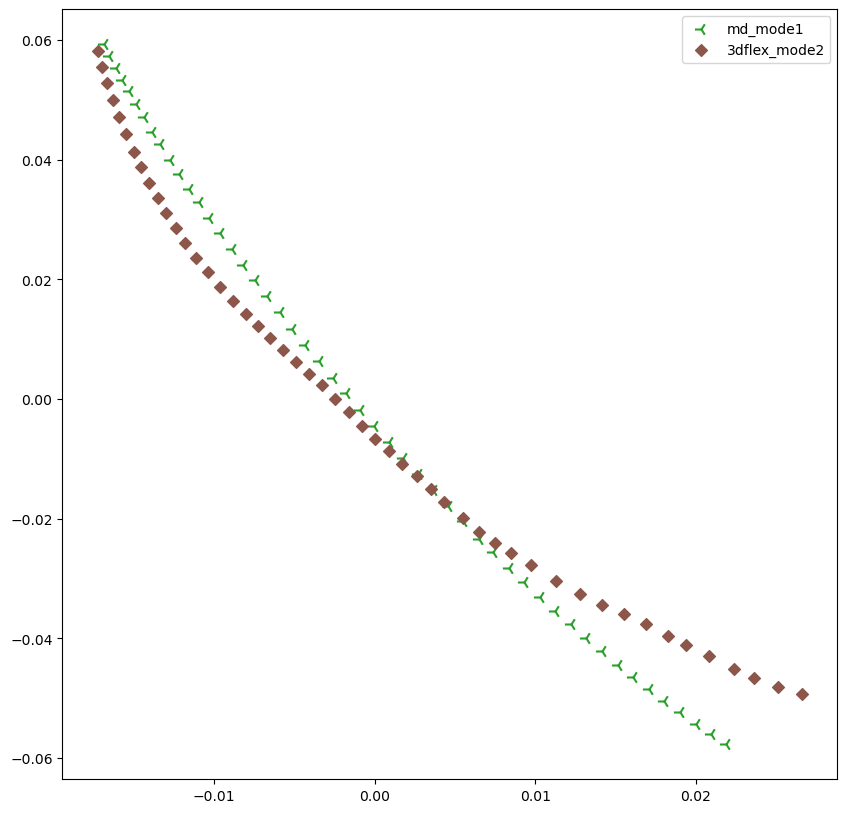

In [9]:
common_embedding = common_embedding_results["common_embedding"]

marker_list = ['x','.','3','+','v','D','1','s','2','o','4','5']
color_list = ['#1f77b4', '#bcbd22', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#ffff00', '#17becf', '#ff7f0e', '#2ca02c']

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, method in enumerate(methods_data.keys()):
    print(method)
    if method == '3dflex_mode2' or method == 'md_mode1':
        if 'md_mode1' == method:
            ax.scatter(common_embedding[method][:, 0], common_embedding[method][:, 1], label=method, marker=marker_list[i], color=color_list[i],s=90)

        else:   
            ax.scatter(common_embedding[method][:, 0], common_embedding[method][:, 1], label=method, marker=marker_list[i], color=color_list[i])
    # ax.scatter(common_embedding[method][:, 0], common_embedding[method][:, 1])

ax.legend()
# plt.savefig('3dflex_md_common_embedding.pdf')

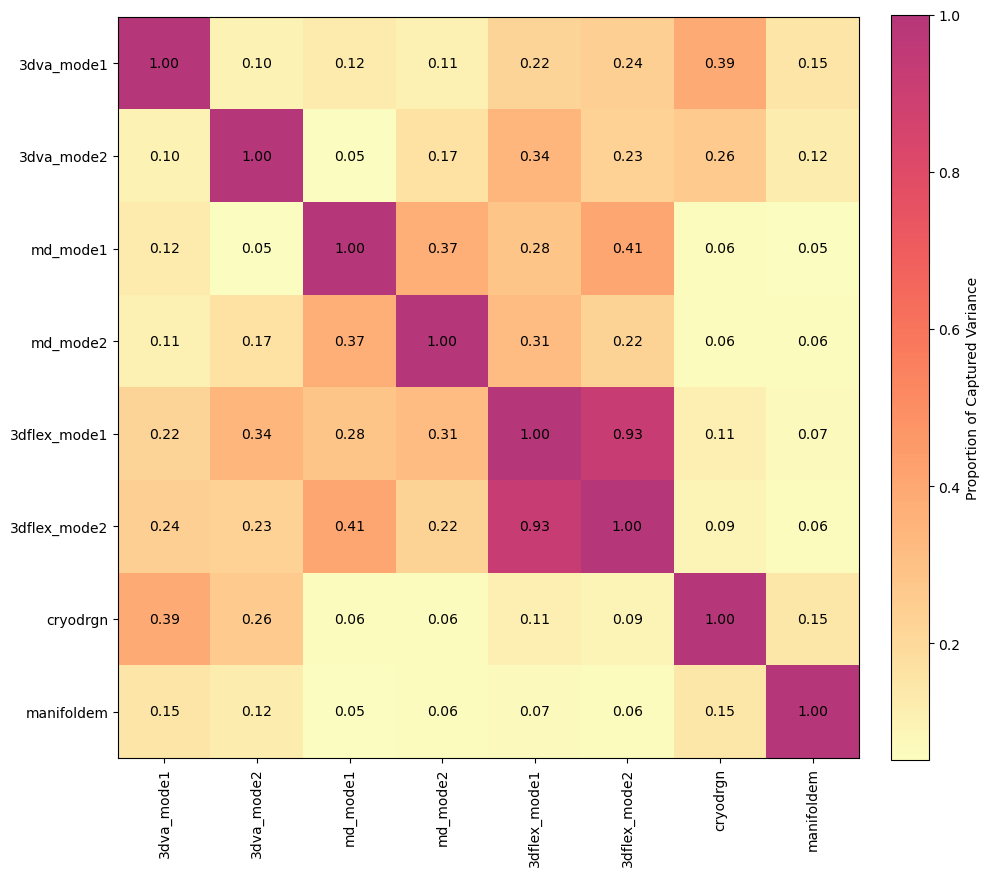

In [11]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

original_cmap = matplotlib.colormaps['magma_r']  # Get the original Magma colormap

lighter_cmap = truncate_colormap(original_cmap, maxval=0.5) 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for (j,i),label in np.ndenumerate(distance_matrix):
    ax.text(i,j,format(label,'#1.2f'),ha='center',va='center')

ax.set_xticks(range(len(methods_data.keys())), dist_mtx_labels, rotation='vertical')
ax.set_yticks(range(len(methods_data.keys())), dist_mtx_labels)

im = ax.imshow(distance_matrix,cmap=lighter_cmap)
fig.colorbar(im, cmap=lighter_cmap, label="Proportion of Captured Variance", fraction=0.046, pad=0.04)

plt.tight_layout()
plt.savefig('miro_distance_matrix_plot.pdf', dpi=300)


3dva_mode1
3dva_mode2
md_mode1
md_mode2
3dflex_mode1
3dflex_mode2
cryodrgn
manifoldem


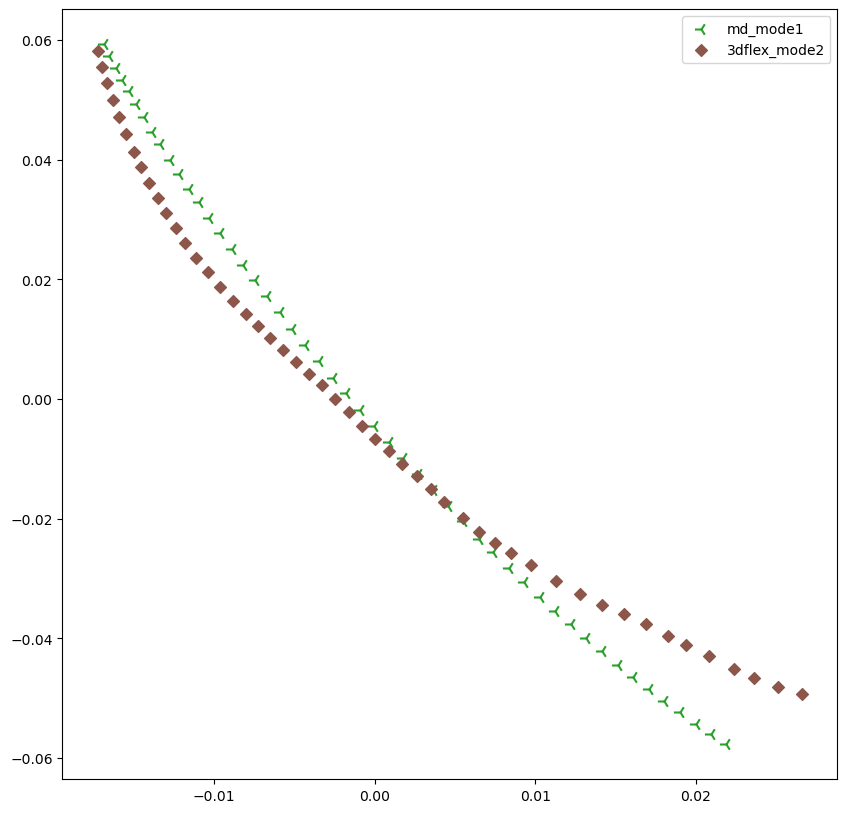

In [12]:
common_embedding = common_embedding_results["common_embedding"]

marker_list = ['x','.','3','+','v','D','1','s','2','o','4','5']
color_list = ['#1f77b4', '#bcbd22', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#ffff00', '#17becf', '#ff7f0e', '#2ca02c']

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, method in enumerate(methods_data.keys()):
    print(method)
    if method == '3dflex_mode2' or method == 'md_mode1':
        if 'md_mode1' == method:
            ax.scatter(common_embedding[method][:, 0], common_embedding[method][:, 1], label=method, marker=marker_list[i], color=color_list[i],s=90)

        else:   
            ax.scatter(common_embedding[method][:, 0], common_embedding[method][:, 1], label=method, marker=marker_list[i], color=color_list[i])
    # ax.scatter(common_embedding[method][:, 0], common_embedding[method][:, 1])

ax.legend()
# plt.savefig('3dflex_md_common_embedding.pdf')

In [13]:
# methods_data['manifoldem']['volumes'][5].mean(0)


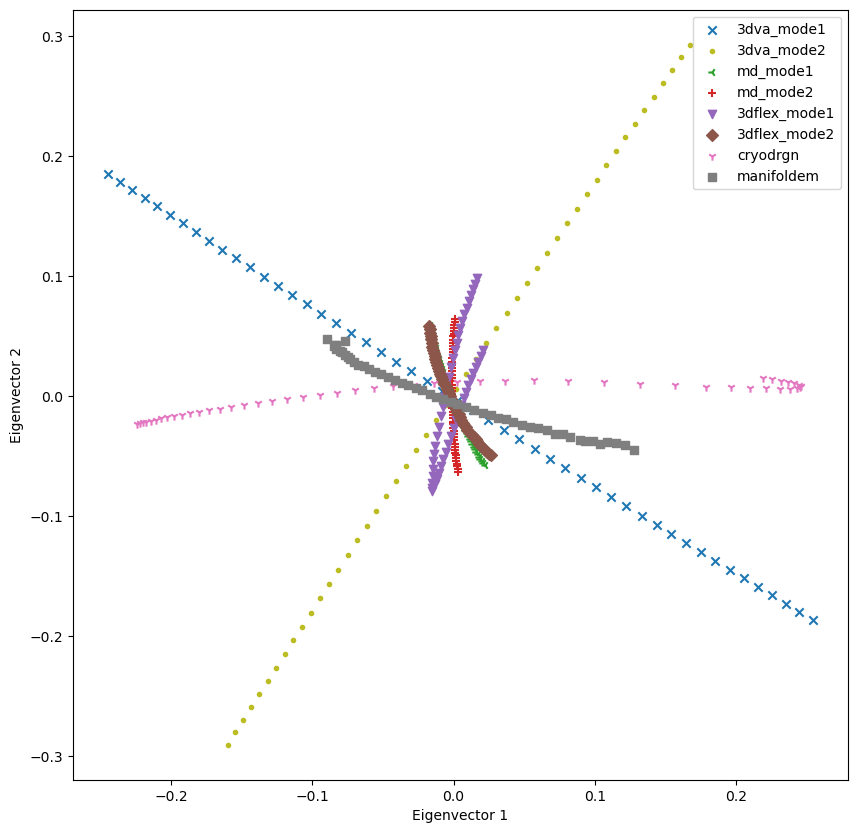

In [14]:

marker_list = ['x','.','3','+','v','D','1','s','2','o','4']
color_list = ['#1f77b4', '#bcbd22', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#ffff00', '#17becf', '#ff7f0e', '#2ca02c']
# print(len(labels))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
pc1=0
pc2=1

for i, method in enumerate(methods_data.keys()):
    ax.scatter(common_embedding[method][:, pc1], common_embedding[method][:, pc2], marker=marker_list[i], color=color_list[i], label=method)

ax.legend()

plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.savefig('common_embedding_svd_scaled.pdf')

In [ ]:
from analysis_code.power_spectrum_utils import compute_power_spectrums
power_spectrums = compute_power_spectrums (methods_data,pixel_size=1.22)

192


 25%|███████████████████████████████████████████████████                                                                                                                                                         | 2/8 [02:46<08:20, 83.40s/it]

In [ ]:
print(methods_data['3dva_mode1']['volumes'])

In [ ]:
print(len(power_spectrums['3dva_mode1']['power_spectrums'][0]))

In [ ]:
# print(power_spectrums.keys())
# # power_spectrums['frequencies'] = power_spectrums['frequencies'][power_spectrums['frequencies'] >= 0]
# # p_tens = [''] * len(power_spectrums['power_spectrums'])
# for i in range((len(power_spectrums['power_spectrums']))):
#     p_tens [i] = torch.stack( power_spectrums['power_spectrums'][i])
# print(len(p_tens))

# p_tens = torch.stack(p_tens)
# print(p_tens.shape)

# # power_spectrums['power_spectrums'][0]


In [ ]:
len((power_spectrums[method]['power_spectrums'][:,0].numpy()))

In [ ]:
fig, axes = plt.subplots(len(methods_data.keys()), 1, figsize=(10, 20), sharex=True)


# specs = np.array(p_tens)
# print(specs.shape)
keys = list(power_spectrums.keys())
print(keys)
spec_shape = np.shape(power_spectrums[keys[0]]['power_spectrums'])
print(spec_shape)
specs_normed = np.zeros([len(keys),spec_shape[0],spec_shape[1]])
# stacked_specs = torch.stack()

for i,method in enumerate(power_spectrums.keys()):
    specs_normed[i] = power_spectrums[method]['power_spectrums'] / np.mean((power_spectrums[method]['power_spectrums'][:,0].numpy()))

# jnp.std(specs[i],axis=0)

for i,method1 in enumerate(power_spectrums.keys()):
    for j in range(len(power_spectrums[method1]['power_spectrums'])):
        #axes[i].semilogx(2*len(specs[i][j])*pixel_size/np.arange(len(specs[i][j])),jnp.std(jnp.array(specs[i]),axis=0)) 
        axes[i].semilogx(power_spectrums[method1]['frequencies'],np.array(specs_normed[i][j])) 
        # axes[i].semilogx(power_spectrums[method1]['frequencies'],power_spectrums[method1]['power_spectrums'][j]) 

        # print(np.sum(specs[i][j]))
    # axes[i].set_title(power_spectrums['labels'][i])

    # axes[i].set_ylim([0,60])

axes[i].set_xlabel('signal period $\AA$') 

plt.show()

In [ ]:

vars = np.array([np.sum((np.std(specs_normed[i],axis=0))) for i in range(len(specs_normed))])/np.shape(specs_normed)[1]
fig = plt.figure(figsize=(10,10))
plt.yticks(fontsize=16)
# plt.yticks()
plt.bar (methods_data.keys(), (vars)) 
plt.ylabel('Total Power Spectrum Variance',fontsize=24)
plt.xlabel('Method')
# print(np.array(vars))
# plt.ylim([0,1800])
plt.tight_layout()

# plt.savefig('spectral_variance.pdf')
plt.show()
